# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 01:59MSK 23.11.2021

Жестокий дедлайн: 01:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

**1:** https://contest.yandex.ru/contest/31332/run-report/58674489/

**2:** https://contest.yandex.ru/contest/31332/run-report/59174286/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
datasets = [
    make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

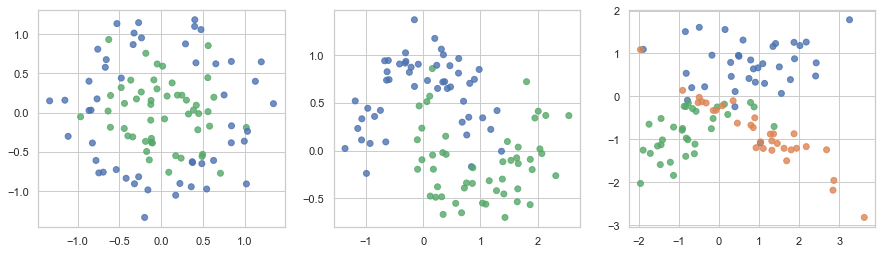

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

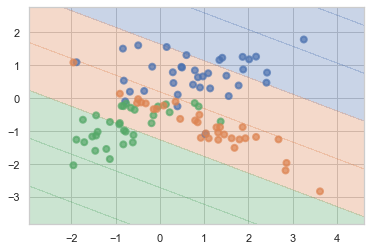

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Train score:  1.0
Test score:  0.75


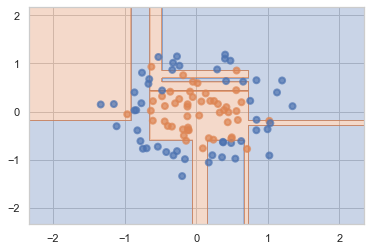

In [7]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('Train score: ', accuracy_score(y_train, tree.predict(X_train)))
print('Test score: ',accuracy_score(y_test, y_pred))

plot_surface(tree, X, y)

Train score:  1.0
Test score:  0.75


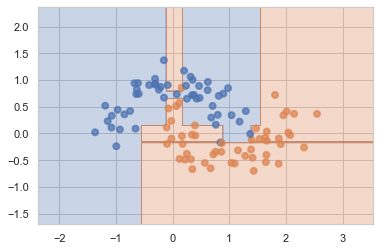

In [8]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.predict(X_test)
print('Train score: ', accuracy_score(y_train, tree.predict(X_train)))
print('Test score: ',accuracy_score(y_test, y_pred))
plot_surface(tree, X, y)

Train score:  1.0
Test score:  0.4


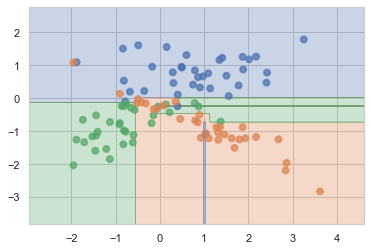

In [9]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.predict(X_test)
print('Train score: ', accuracy_score(y_train, tree.predict(X_train)))
print('Test score: ',accuracy_score(y_test, y_pred))
plot_surface(tree, X, y)

__Ответ:__ Деревья со стандартными параметрами сильно переобучились, из-за этого видим низкие значения accuracy на тесте.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [10]:
params = {'max_depth': [1, 2, 4, 8],
          'min_samples_leaf': [1, 2, 4]
}

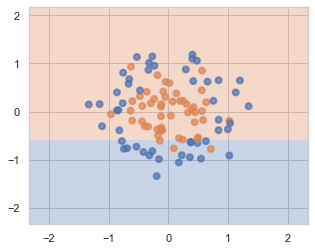

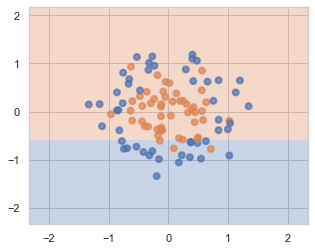

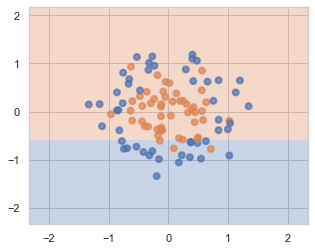

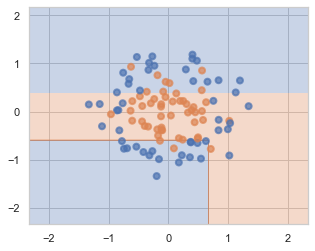

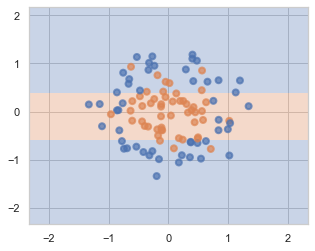

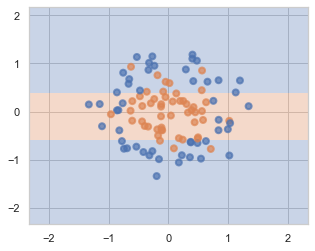

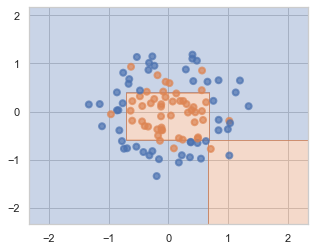

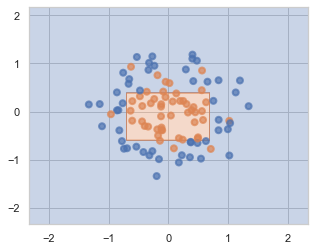

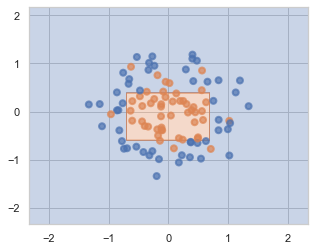

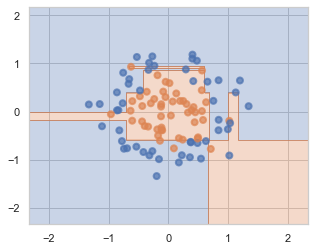

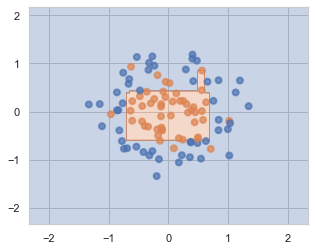

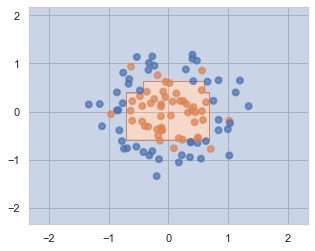

In [11]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=66)

tree = DecisionTreeClassifier()
gs = GridSearchCV(tree, param_grid=params, cv=5, scoring='accuracy', return_train_score=True)
gs.fit(X_train, y_train)

results = pd.DataFrame({'depth': [], 'leaves': [], 'train_score': [], 'test_score': []})
for i, param in enumerate(gs.cv_results_['params']):
    depth, leaves = param['max_depth'], param['min_samples_leaf']
    tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaves)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    plt.figure(figsize=(5, 4))
    plot_surface(tree, X, y)
    results.loc[i] = [depth, leaves,
                      accuracy_score(y_train, tree.predict(X_train)),
                      accuracy_score(y_test, y_pred)]

In [12]:
results

depth  leaves  train_score  test_score
0     1.0     1.0     0.666667         0.5
1     1.0     2.0     0.666667         0.5
2     1.0     4.0     0.666667         0.5
3     2.0     1.0     0.788889         0.5
4     2.0     2.0     0.777778         0.6
5     2.0     4.0     0.777778         0.6
6     4.0     1.0     0.900000         0.7
7     4.0     2.0     0.877778         0.8
8     4.0     4.0     0.877778         0.8
9     8.0     1.0     0.988889         0.7
10    8.0     2.0     0.922222         0.8
11    8.0     4.0     0.922222         0.9

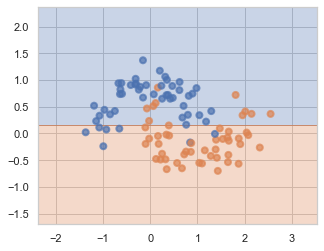

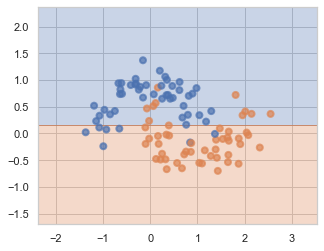

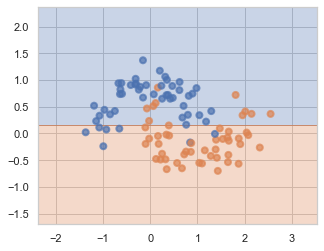

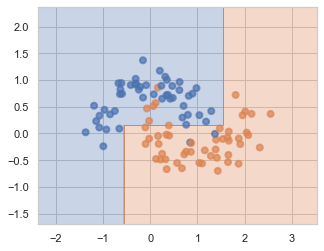

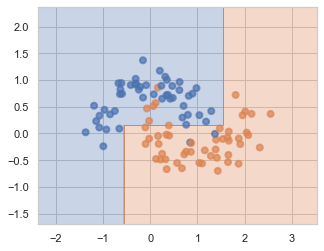

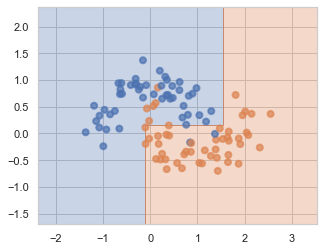

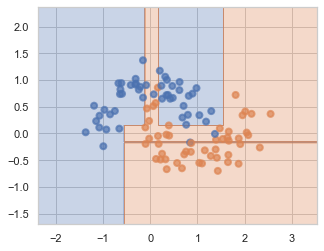

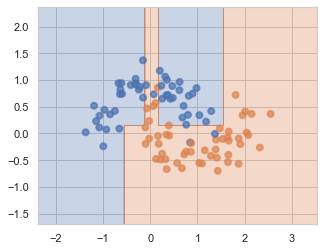

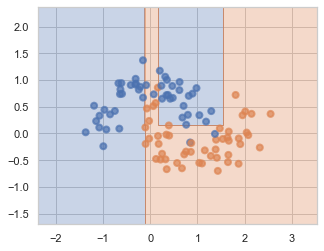

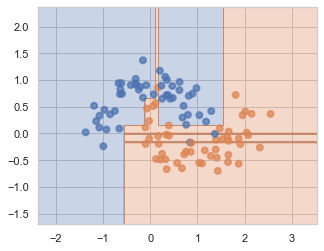

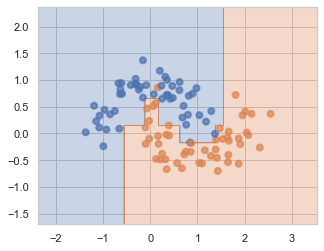

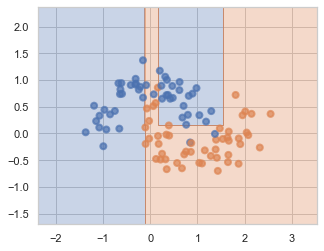

In [13]:
results = pd.DataFrame({'depth': [], 'leaves': [], 'train_score': [], 'test_score': []})
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=66)

tree = DecisionTreeClassifier()
gs = GridSearchCV(tree, param_grid=params, cv=5, scoring='accuracy', return_train_score=True)
gs.fit(X_train, y_train)

for i, param in enumerate(gs.cv_results_['params']):
    depth, leaves = param['max_depth'], param['min_samples_leaf']
    tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaves)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    plt.figure(figsize=(5, 4))
    plot_surface(tree, X, y)
    results.loc[i] = [depth, leaves,
                      accuracy_score(y_train, tree.predict(X_train)),
                      accuracy_score(y_test, y_pred)]

In [14]:
results

depth  leaves  train_score  test_score
0     1.0     1.0     0.833333         0.8
1     1.0     2.0     0.833333         0.8
2     1.0     4.0     0.833333         0.8
3     2.0     1.0     0.922222         1.0
4     2.0     2.0     0.922222         1.0
5     2.0     4.0     0.911111         1.0
6     4.0     1.0     0.977778         0.9
7     4.0     2.0     0.966667         0.9
8     4.0     4.0     0.955556         0.9
9     8.0     1.0     1.000000         1.0
10    8.0     2.0     0.988889         1.0
11    8.0     4.0     0.955556         0.9

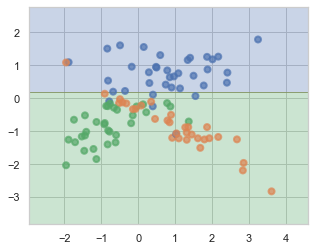

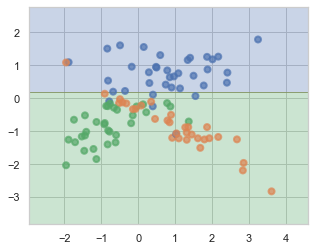

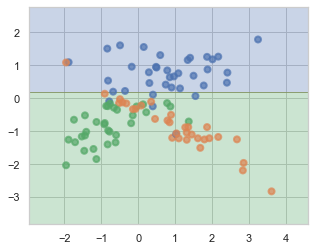

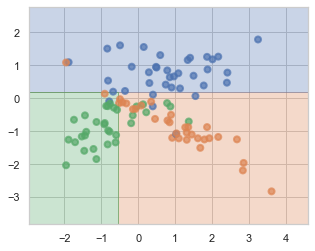

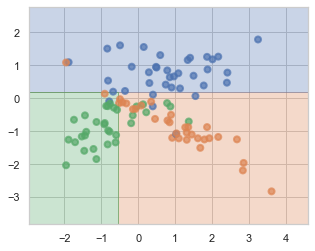

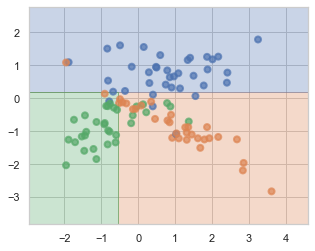

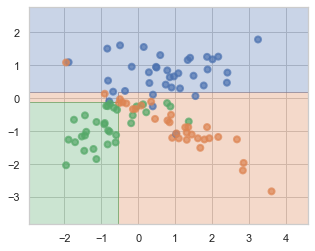

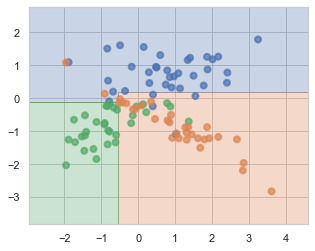

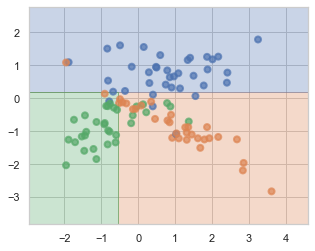

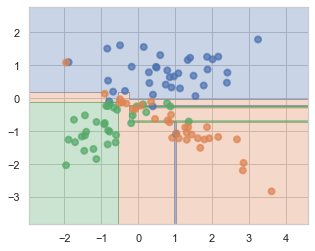

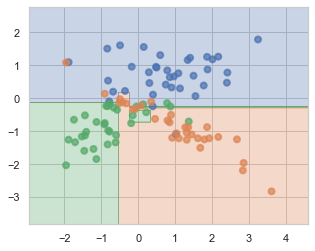

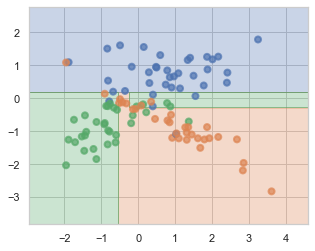

In [15]:
results = pd.DataFrame({'depth': [], 'leaves': [], 'train_score': [], 'test_score': []})
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=66)

tree = DecisionTreeClassifier()
gs = GridSearchCV(tree, param_grid=params, cv=5, scoring='accuracy', return_train_score=True)
gs.fit(X_train, y_train)

for i, param in enumerate(gs.cv_results_['params']):
    depth, leaves = param['max_depth'], param['min_samples_leaf']
    tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaves)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    plt.figure(figsize=(5, 4))
    plot_surface(tree, X, y)
    results.loc[i] = [depth, leaves,
                      accuracy_score(y_train, tree.predict(X_train)),
                      accuracy_score(y_test, y_pred)]

In [16]:
results

depth  leaves  train_score  test_score
0     1.0     1.0     0.633333         0.5
1     1.0     2.0     0.633333         0.5
2     1.0     4.0     0.633333         0.5
3     2.0     1.0     0.877778         0.6
4     2.0     2.0     0.877778         0.6
5     2.0     4.0     0.877778         0.6
6     4.0     1.0     0.900000         0.6
7     4.0     2.0     0.888889         0.6
8     4.0     4.0     0.877778         0.6
9     8.0     1.0     0.977778         0.7
10    8.0     2.0     0.944444         0.6
11    8.0     4.0     0.900000         0.6

__Ответ:__ 

**1 датасет:** При увеличении значения параметра min_leaf_samples, модель меньше подстраивается под тренировочную выборку, соответственно снижается степень переобучения.

**2 датасет:** Подбор параметров почти ни на что не влияет, так как данные уже разбиты на плоскости на 2 группы.


**3 датасет:** При увеличении параметра max_depth модель увеливает свой тренировочный скор, но при этом добиться лучшей точности на тестовый выборке чем 0.6 не выходит, связано это с тем, что все 3 группы смешаны в одну группу на плоскости, из-за этого модели сложно разбить ее "хорошо".


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [17]:
from hw5code import find_best_split, DecisionTree

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from termcolor import colored

import plotly.express as px

In [18]:
%load_ext autoreload
%autoreload 2

In [19]:
# !wget https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv

In [20]:
df = pd.read_csv('students.csv')
df.head()

STG   SCG   STR   LPR   PEG   UNS
0  0.00  0.00  0.00  0.00  0.00     0
1  0.08  0.08  0.10  0.24  0.90     1
2  0.06  0.06  0.05  0.25  0.33     0
3  0.10  0.10  0.15  0.65  0.30     1
4  0.08  0.08  0.08  0.98  0.24     0

In [21]:
df.rename({' UNS': 'target'}, axis=1, inplace=True)

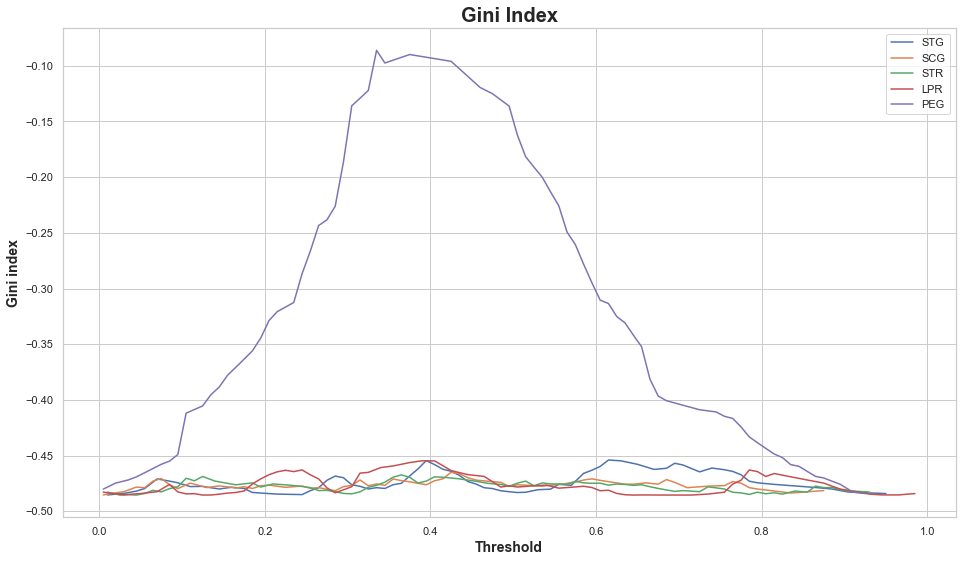

In [22]:
plt.figure(figsize=(16, 9))
for feature in df.columns[:-1]:
    thresholds, ginis, _, _ = find_best_split(df[feature], np.array(df['target']))
    sns.lineplot(thresholds, ginis)
    
plt.legend(labels=df.columns[:-1])
plt.title('Gini Index', weight='bold', size=20)
plt.xlabel('Threshold', weight='bold', size=14)
plt.ylabel('Gini index', weight='bold', size=14)
plt.show()

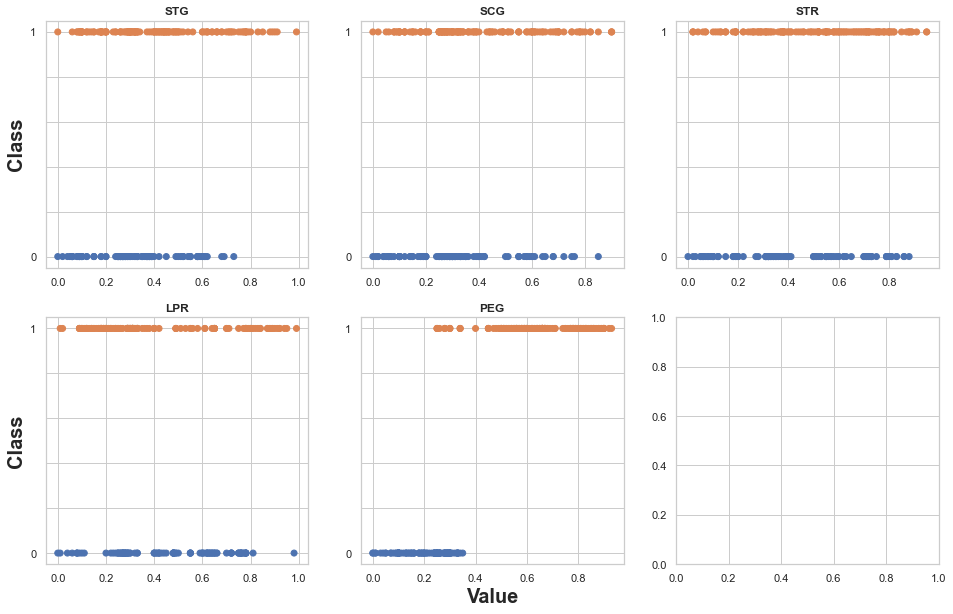

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))


palette = sns.color_palette(n_colors=2)
cmap = ListedColormap(palette)
for i in range(5):
    axs[i // 3][i % 3].scatter(df[df.columns[i]], df['target'], cmap=cmap, c=df['target'])
    axs[i // 3][i % 3].set_title(df.columns[i], weight='bold')
    axs[i // 3][i % 3].set_yticklabels([None, 0, None, None, None, None, 1])
    if i % 3 == 0:
        axs[i // 3][i % 3].set_ylabel('Class', weight='bold', size=20)
    if i // 3 == 1 and i == 4:
        axs[i // 3][i % 3].set_xlabel('Value', weight='bold', size=20)


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Нужно выполнять деление по признаку **PEG**. Этот результат согласуется с результатми scatter графиков. Для "хороших" признаков кривая должна выглядеть как "колокол". Кривые для признаков, для которых деление прктически невозможно похожи на прямую линию.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [24]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
df.head()

p  x  s  n  t p.1  f  c n.1  k  ... s.2  w w.1 p.2 w.2  o p.3 k.1 s.3  u
0  e  x  s  y  t   a  f  c   b  k  ...   s  w   w   p   w  o   p   n   n  g
1  e  b  s  w  t   l  f  c   b  n  ...   s  w   w   p   w  o   p   n   n  m
2  p  x  y  w  t   p  f  c   n  n  ...   s  w   w   p   w  o   p   k   s  u
3  e  x  s  g  f   n  f  w   b  k  ...   s  w   w   p   w  o   e   n   a  g
4  e  x  y  y  t   a  f  c   b  n  ...   s  w   w   p   w  o   p   k   n  g

[5 rows x 23 columns]

In [25]:
enc = LabelEncoder()
for col in df.columns:
    df[col] = enc.fit_transform(df[col])
    
X, y = df.drop('p', axis=1), df['p']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [26]:
cols = []
for i in np.where((X_train.dtypes == 'object') == True)[0]:
    cols.append('categorical')
for i in np.where((X_train.dtypes == 'object') == False)[0]:
    cols.append('real')

In [27]:
tree = DecisionTree(cols)
tree.fit(X_train.values, y_train.values)
print('Accuracy test:', accuracy_score(tree.predict(X_test.values), y_test))

Accuracy test: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [47]:
df_tic = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
X, y = df_tic.drop('positive', axis=1), df_tic['positive'] == 'positive'
    
types = np.full(X.shape[1], 'categorical')
tree = DecisionTree(types)

In [29]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 4, 8, 16, 32],
          'min_samples_split': [2, 10, 20, 100, 200, 1000],
          'min_samples_leaf': [1, 2, 4, 10, 20, 50]
}
gs = GridSearchCV(tree, param_grid=params, cv=10, verbose=1)
gs.fit(X.values, y.values)
print('best_score: %.4f' % gs.best_score_)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
best_score: 0.8194


In [30]:
results = pd.DataFrame(gs.cv_results_['params']).reset_index()
results['mean_test'] = gs.cv_results_['mean_test_score']
results.head()

fig = px.line(results, x="index", y="mean_test", hover_data={'index': False, 
                                                             'min_samples_split':True,
                                                             'min_samples_leaf': True,
                                                             'max_depth': True,
                                                             'mean_test': False,
                                                            }
             )
fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x")
fig.show()

In [58]:
tree = DecisionTree(types)
params = {'max_depth': [16],
          'min_samples_split': [2, 3, 4, 5, 8, 16, 32, 64, 128],
          'min_samples_leaf': [2]
}
gs = GridSearchCV(tree, param_grid=params, cv=10, verbose=1)
gs.fit(X.values, y.values)
print('best_score: %.4f' % gs.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best_score: 0.8131


In [59]:
results = pd.DataFrame(gs.cv_results_['params']).reset_index()
results['mean_test'] = gs.cv_results_['mean_test_score']


fig = px.line(results, x="index", y="mean_test", hover_data={'index': False,
                             'min_samples_split':True,
                             'mean_test': False,
                             }, title='min_samples_split')
fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x")

fig.show()

In [60]:
tree = DecisionTree(types)
params = {'max_depth': [16],
          'min_samples_split': [5],
          'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 128]
}
gs = GridSearchCV(tree, param_grid=params, cv=10, verbose=1)
gs.fit(X.values, y.values)
print('best_score: %.4f' % gs.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
best_score: 0.8131


In [61]:
results = pd.DataFrame(gs.cv_results_['params']).reset_index()
results['mean_test'] = gs.cv_results_['mean_test_score']


fig = px.line(results, x="index", y="mean_test", hover_data={'index': False,
                             'min_samples_leaf':True,
                             'mean_test': False,
                             })

fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x")

fig.show()

In [62]:
tree = DecisionTree(types)
params = {'max_depth': [1, 2, 4, 8, 16, 32, 64],
          'min_samples_split': [5],
          'min_samples_leaf': [1]
}
gs = GridSearchCV(tree, param_grid=params, cv=10, verbose=1)
gs.fit(X.values, y.values)
print('best_score: %.4f' % gs.best_score_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
best_score: 0.8163


In [63]:
results = pd.DataFrame(gs.cv_results_['params']).reset_index()
results['mean_test'] = gs.cv_results_['mean_test_score']


fig = px.line(results, x="index", y="mean_test", hover_data={'index': False,
                             'max_depth':True,
                             'mean_test': False,
                             })

fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x")

fig.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

**[a]**

In [37]:
df_mush = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
df_tic = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
df_cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
df_nurse = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')

df_cars.drop('unacc', axis=1), df_cars['unacc']
df_nurse.drop('recommend', axis=1), df_nurse['recommend']

train_test = {}
train_test['mushrooms'] = ((df_mush.drop('p', axis=1), df_mush['p'] == 'e'))
train_test['tic-tac-toe'] = ((df_tic.drop('positive', axis=1), df_tic['positive'] == 'positive'))

train_test['cars'] = ((df_cars.drop('unacc', axis=1),
                   ((df_cars['unacc'] == 'unacc') | (df_cars['unacc'] == 'acc'))))

train_test['nursery'] = (df_nurse.drop('recommend', axis=1),
                   ((df_nurse['recommend'] != 'not_recom') & (df_nurse['recommend'] != 'recommend')))

In [38]:
results = pd.DataFrame({'as_real': [], 'as_cat': [], 'ohe_real': [], 'sklearn_tree': []})

for k, v in train_test.items():
    
    ## 1
    X, y = v
    print(colored(k.upper(), 'red', attrs=['bold']))
    enc = LabelEncoder()
    for col in X.columns:
        X[col] = enc.fit_transform(X[col])
        
    types = np.full(X.shape[1], 'real')
    tree = DecisionTree(types)
    score_real = cross_val_score(tree, X.values, y.values, scoring=make_scorer(accuracy_score), cv=10).mean()
    print('With features as Real: %.4f' % score_real)
    
    ## 2        
    types = np.full(X.shape[1], 'categorical')
    tree = DecisionTree(types)
    score_cat = cross_val_score(tree, X.values, y.values, scoring=make_scorer(accuracy_score), cv=10).mean()
    print('With features as Categorical: %.4f' % score_cat)
    
    ## 3
    X_ohe = pd.get_dummies(X)
    types = np.full(X_ohe.shape[1], 'real')
    tree = DecisionTree(types)
    score_ohe = cross_val_score(tree, X_ohe.values, y.values, scoring=make_scorer(accuracy_score), cv=10).mean()
    print('With ohe features as Real: %.4f' % score_ohe)
    
    ## 4
    tree = DecisionTreeClassifier()
    score = cross_val_score(tree, X.values, y.values, scoring=make_scorer(accuracy_score), cv=10).mean()
    print('Sklearn Tree: %.4f' % score)
    
    results.loc[k] = [score_real, score_cat, score_ohe, score]

MUSHROOMS
With features as Real: 0.9672
With features as Categorical: 0.9686
With ohe features as Real: 0.9672
Sklearn Tree: 0.9576
TIC-TAC-TOE
With features as Real: 0.7652
With features as Categorical: 0.8163
With ohe features as Real: 0.7652
Sklearn Tree: 0.7580
CARS
With features as Real: 0.9461
With features as Categorical: 0.8746
With ohe features as Real: 0.9461
Sklearn Tree: 0.9450
NURSERY
With features as Real: 0.9998
With features as Categorical: 0.9999
With ohe features as Real: 0.9998
Sklearn Tree: 0.9998


In [39]:
results

as_real    as_cat  ohe_real  sklearn_tree
mushrooms    0.967157  0.968635  0.967157      0.957551
tic-tac-toe  0.765208  0.816327  0.765208      0.757982
cars         0.946118  0.874590  0.946118      0.944952
nursery      0.999769  0.999923  0.999769      0.999846

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [64]:
print('Mushrooms balance: %.4f' % (df_mush['p'] == 'e').mean())
print('Tic-tac-toe balance: %.4f' % (df_tic['positive'] == 'positive').mean())
print('Cars balance: %.4f' % ((df_cars['unacc'] == 'unacc') | (df_cars['unacc'] == 'acc')).mean())
print('Nurses balance: %.4f' % ((df_nurse['recommend'] != 'not_recom') & (df_nurse['recommend'] != 'recommend')).mean())


Mushrooms balance: 0.5180
Tic-tac-toe balance: 0.6531
Cars balance: 0.9224
Nurses balance: 0.6666


**Ответ:** Для набора данных **tic-tac-toe** лучший результат показало самодельное дерево, скорее всего из-за встроенных счетчиков для категориальных признаков. Для датасета **cars** представление признаков как категориальных не дало прироста в метрике accuracy. В остальных, почти никак не влияет различное представление признаков(будь то *ohe* или *счетчики*).

Компонента случайности - разбиение на тренировочную и тестовые выборки, процентное отношение классов должно быть одинаковым для адекватной оценки точности, для этого можно установить нужный параметр при разбиении.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

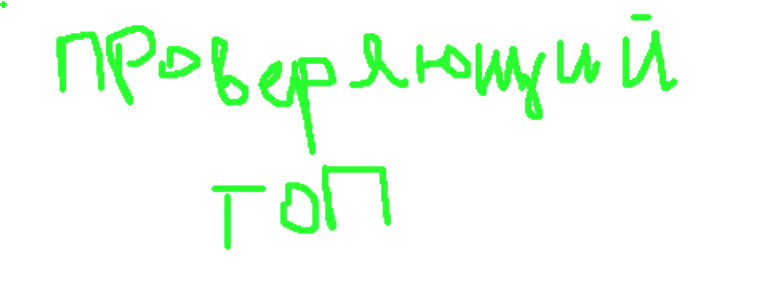

In [41]:
from PIL import Image
Image.open('check.png')